In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

wine = pd.read_csv("wines.csv")
data = wine.to_numpy()
data_standard = (data - np.mean(data, axis=0)) / np.std(data, axis=0)


[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


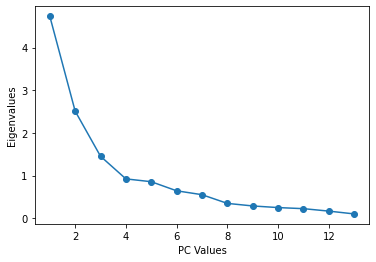

In [236]:
x = data_standard
pca = PCA()
pca.fit(x)

x_pca = pca.transform(x)

pc_vals = np.arange(pca.n_components_) + 1

eigenvals = pca.explained_variance_

plt.plot(pc_vals, eigenvals, "o-")
plt.xlabel("PC Values")
plt.ylabel("Eigenvalues")
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Component 2')

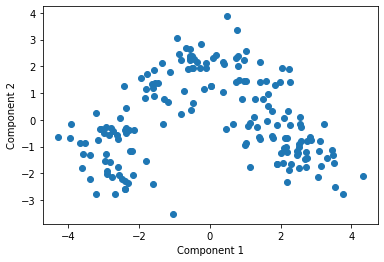

In [138]:
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.xlabel("Component 1")
plt.ylabel("Component 2")

In [100]:
kl = []
for i in range(5, 151):
    tsne = TSNE(perplexity = i)
    x_tsne = tsne.fit_transform(x)
    kl_diverge = tsne.kl_divergence_
    
    kl.append(kl_diverge)

    

Text(0, 0.5, 'Component 2')

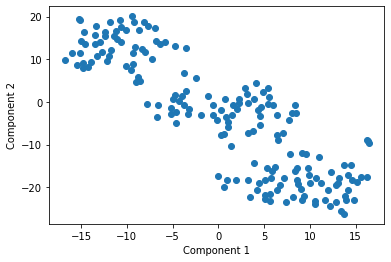

In [237]:
tsne1 = TSNE(perplexity = 20)
x_vals = tsne1.fit_transform(x)
plt.scatter(x_vals[:,0], x_vals[:,1])
plt.xlabel("Component 1")
plt.ylabel("Component 2")

Text(0.5, 1.0, 'KL divergence vs. Perplexity')

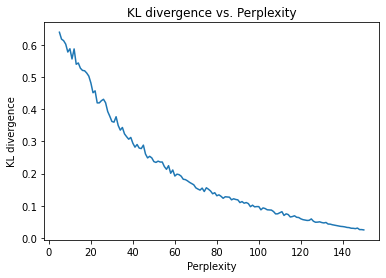

In [238]:
x_values = np.arange(5, 151)

plt.plot(x_values, kl)
plt.xlabel("Perplexity")
plt.ylabel("KL divergence")
plt.title("KL divergence vs. Perplexity")

20847.433587915788


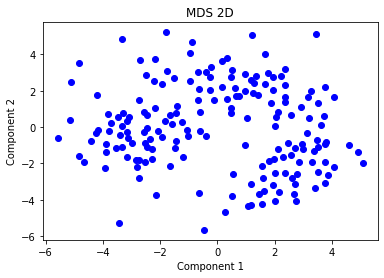

In [243]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances
D = euclidean_distances(x, x)
mds = MDS(n_init=100, max_iter = 10000, dissimilarity='precomputed')
fit = mds.fit_transform(D)
plt.scatter(fit[:,0], fit[:,1], color='blue') 
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("MDS 2D")

print(mds.stress_)


In [247]:
stress = np.sqrt(mds.stress_ / (0.5 * np.sum(D **2)))
print(stress)

0.22497518677666048


For n_clusters = 2 The average silhouette_score is : 0.25931695553182554
For n_clusters = 3 The average silhouette_score is : 0.2848589191898987
For n_clusters = 4 The average silhouette_score is : 0.25987462789190535
For n_clusters = 5 The average silhouette_score is : 0.19734439798042427
For n_clusters = 6 The average silhouette_score is : 0.1381694051986392


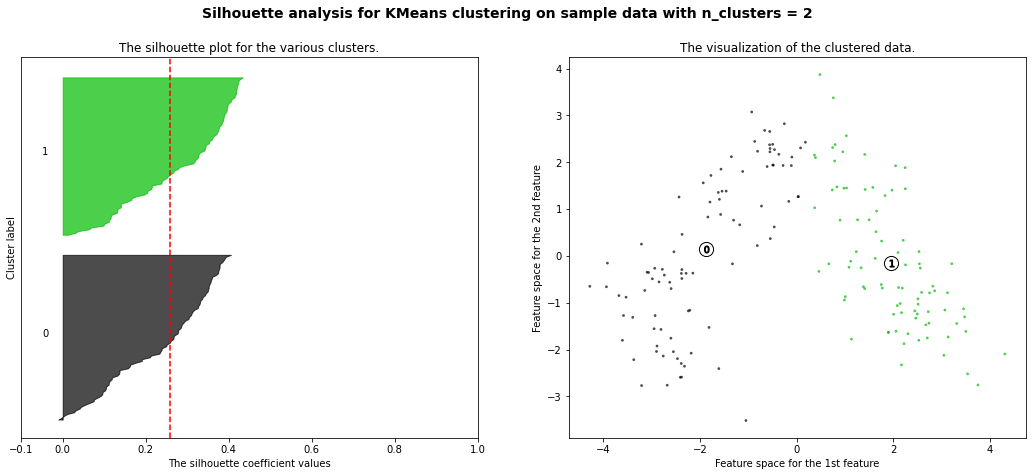

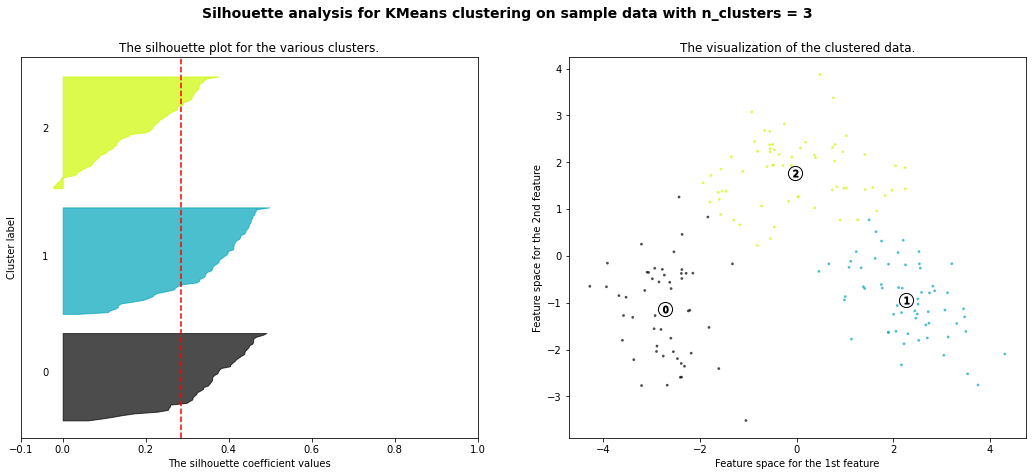

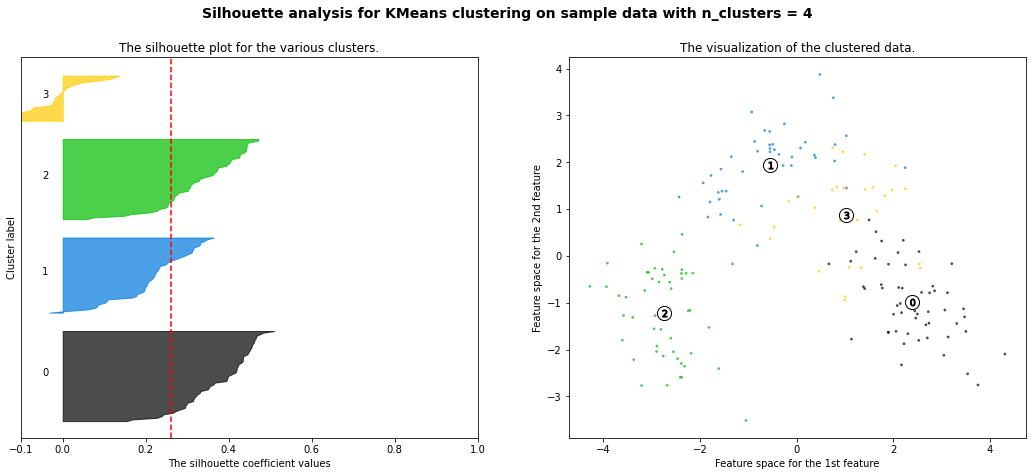

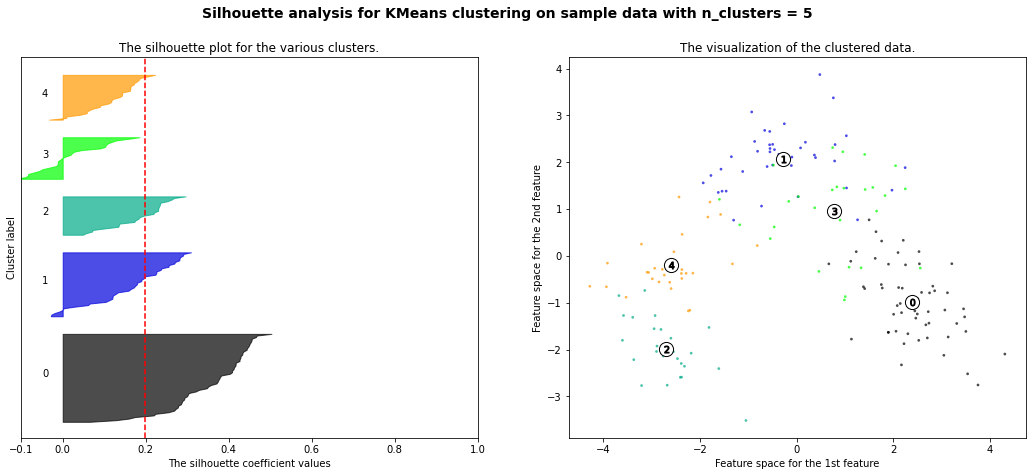

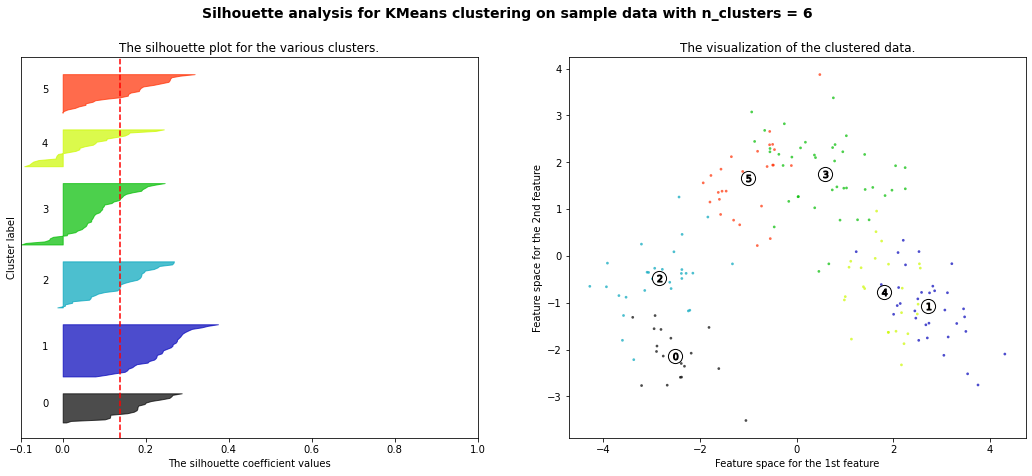

In [150]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(x_pca) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_pca)

    silhouette_avg = silhouette_score(x_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(x_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x_pca[:, 0], x_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Estimated no. of clusters: 3


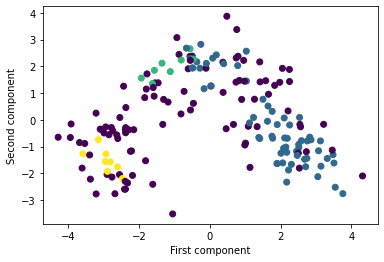

In [249]:
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

dbscan = DBSCAN(eps =2, min_samples = 6)
dbscan.fit(x_pca)


plt.scatter(x_pca[:,0], x_pca[:,1], c=dbscan.labels_, label=y)
plt.xlabel("First component")
plt.ylabel("Second component")


labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters:', N_clus)

(array([ 1., 11., 18., 31., 21., 27., 26., 24., 17.,  2.]),
 array([-2.43423535, -1.96483466, -1.49543397, -1.02603329, -0.5566326 ,
        -0.08723191,  0.38216877,  0.85156946,  1.32097015,  1.79037083,
         2.25977152]),
 <a list of 10 Patch objects>)

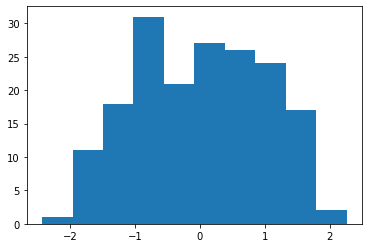

In [251]:
plt.hist(x[:,0])

(array([18., 59., 33., 16., 13., 12., 14.,  7.,  3.,  3.]),
 array([-1.43298305, -0.9787655 , -0.52454795, -0.07033039,  0.38388716,
         0.83810471,  1.29232226,  1.74653981,  2.20075736,  2.65497492,
         3.10919247]),
 <a list of 10 Patch objects>)

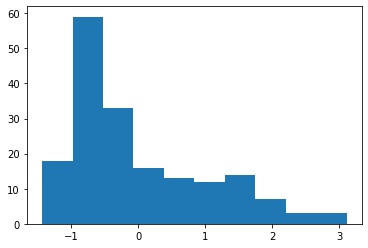

In [252]:
plt.hist(x[:,1])

(array([ 1.,  3.,  7., 14., 43., 54., 31., 20.,  3.,  2.]),
 array([-3.67916223, -2.99561348, -2.31206473, -1.62851598, -0.94496723,
        -0.26141848,  0.42213027,  1.10567902,  1.78922777,  2.47277652,
         3.15632527]),
 <a list of 10 Patch objects>)

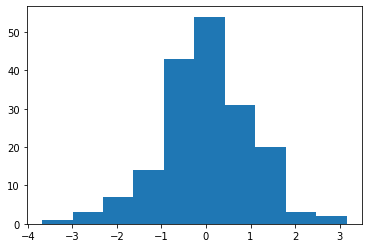

In [253]:
plt.hist(x[:,2])

(array([ 5.,  3., 24., 32., 47., 34., 18., 10.,  2.,  3.]),
 array([-2.67101814, -2.08846525, -1.50591237, -0.92335948, -0.3408066 ,
         0.24174629,  0.82429917,  1.40685206,  1.98940494,  2.57195783,
         3.15451071]),
 <a list of 10 Patch objects>)

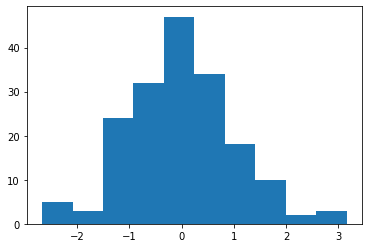

In [254]:
plt.hist(x[:,3])

(array([ 4., 43., 40., 43., 27., 12.,  5.,  2.,  1.,  1.]),
 array([-2.0882552 , -1.44229246, -0.79632973, -0.150367  ,  0.49559574,
         1.14155847,  1.7875212 ,  2.43348394,  3.07944667,  3.72540941,
         4.37137214]),
 <a list of 10 Patch objects>)

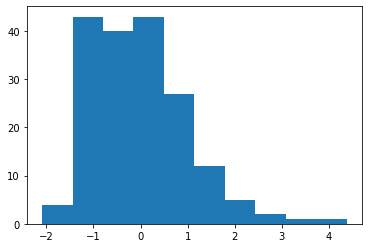

In [255]:
plt.hist(x[:,4])

(array([ 4., 22., 26., 24., 20., 30., 33., 13.,  4.,  2.]),
 array([-2.10724602, -1.64256987, -1.17789373, -0.71321758, -0.24854143,
         0.21613472,  0.68081087,  1.14548702,  1.61016317,  2.07483932,
         2.53951547]),
 <a list of 10 Patch objects>)

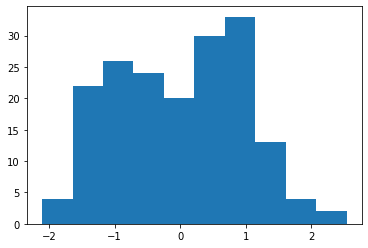

In [256]:
plt.hist(x[:,5])

(array([33., 18., 23., 20., 32., 32., 14.,  5.,  0.,  1.]),
 array([-1.69597053, -1.2200903 , -0.74421007, -0.26832985,  0.20755038,
         0.68343061,  1.15931083,  1.63519106,  2.11107128,  2.58695151,
         3.06283174]),
 <a list of 10 Patch objects>)

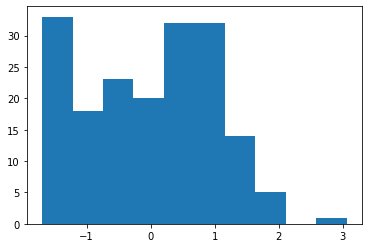

In [257]:
plt.hist(x[:,6])

(array([ 8., 16., 33., 38., 14., 25., 16., 13.,  7.,  8.]),
 array([-1.86823402, -1.4411703 , -1.01410658, -0.58704286, -0.15997914,
         0.26708458,  0.6941483 ,  1.12121203,  1.54827575,  1.97533947,
         2.40240319]),
 <a list of 10 Patch objects>)

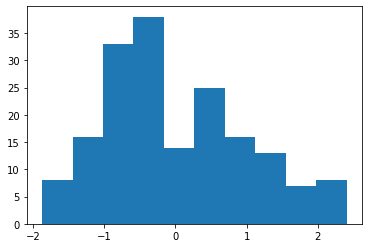

In [258]:
plt.hist(x[:,7])

(array([ 8., 25., 31., 43., 36., 17.,  8.,  7.,  1.,  2.]),
 array([-2.06903418, -1.51362351, -0.95821284, -0.40280217,  0.1526085 ,
         0.70801917,  1.26342983,  1.8188405 ,  2.37425117,  2.92966184,
         3.48507251]),
 <a list of 10 Patch objects>)

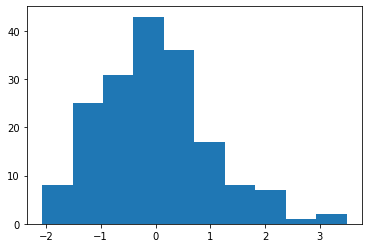

In [259]:
plt.hist(x[:,8])

(array([16., 42., 32., 38., 17., 13., 10.,  6.,  3.,  1.]),
 array([-1.63428828, -1.12731626, -0.62034424, -0.11337222,  0.3935998 ,
         0.90057182,  1.40754384,  1.91451586,  2.42148788,  2.9284599 ,
         3.43543192]),
 <a list of 10 Patch objects>)

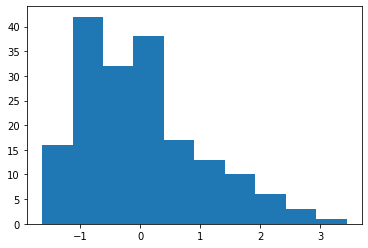

In [260]:
plt.hist(x[:,9])

(array([17., 16., 20., 37., 38., 24., 20.,  5.,  0.,  1.]),
 array([-2.09473241, -1.55508974, -1.01544708, -0.47580442,  0.06383824,
         0.60348091,  1.14312357,  1.68276623,  2.22240889,  2.76205155,
         3.30169422]),
 <a list of 10 Patch objects>)

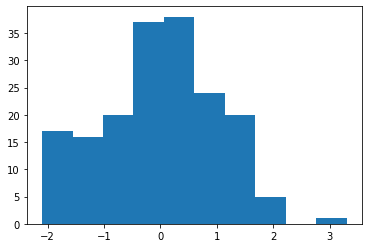

In [261]:
plt.hist(x[:,10])

(array([13., 24., 14., 12., 12., 32., 28., 25., 15.,  3.]),
 array([-1.89505389, -1.50945701, -1.12386012, -0.73826323, -0.35266634,
         0.03293055,  0.41852744,  0.80412433,  1.18972121,  1.5753181 ,
         1.96091499]),
 <a list of 10 Patch objects>)

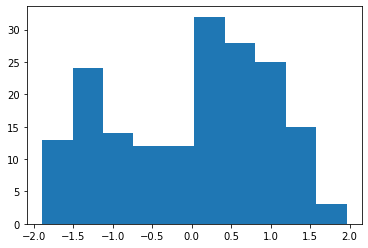

In [262]:
plt.hist(x[:,11])

(array([22., 37., 41., 19., 13., 19.,  8., 13.,  4.,  2.]),
 array([-1.49318765, -1.04672162, -0.6002556 , -0.15378958,  0.29267644,
         0.73914247,  1.18560849,  1.63207451,  2.07854053,  2.52500655,
         2.97147258]),
 <a list of 10 Patch objects>)

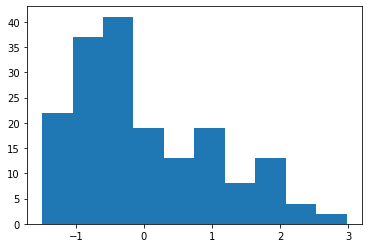

In [263]:
plt.hist(x[:,12])